## Random Forest Baseline Quickstart for NetML-Competition 2020

### * Loads datasets, plots confusion matrix, prints evaluation metrics on validation set and create submission JSON files

In [1]:
import os
import json
import argparse
import time as t
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from utils.helper import *

In [2]:
# Define function to create submissions
def do_submit(clf, test_set, scaler, class_label_pair, filepath):
    Xtest, ids = get_submission_data(test_set)
    X_test_scaled = scaler.transform(Xtest)
    print("Predicting on {} ...".format(test_set.split('/')[-1]))
    predictions = clf.predict(X_test_scaled)
    make_submission(predictions, ids, class_label_pair, filepath)   

In [3]:
# Modify only this cell:
# Note: anno = "mid" is valid ONLY with non-vpn2016 dataset
###
dataset = "./data/CICIDS2017" # or "./data/CICIDS2017" or "./data/non-vpn2016"
anno = "top" # or "mid" or "fine"
submit = "both" # or "test-std" or "test-challenge"
###

In [4]:
# Assign variables
training_set = dataset+"/2_training_set"
training_anno_file = dataset+"/2_training_annotations/2_training_anno_"+anno+".json.gz"
test_set = dataset+"/1_test-std_set"
challenge_set = dataset+"/0_test-challenge_set"

In [5]:
# Create folder for the results
time_ = t.strftime("%Y%m%d-%H%M%S")

save_dir = os.getcwd() + '/results/' + time_
os.makedirs(save_dir)

In [6]:
# Get training data in np.array format
Xtrain, ytrain, class_label_pair, Xtrain_ids = get_training_data(training_set, training_anno_file)

# Split validation set from training data
X_train, X_val, y_train, y_val = train_test_split(Xtrain, ytrain,
                                                test_size=0.2, 
                                                random_state=42,
                                                stratify=ytrain)


Loading training set ...
Reading 2_training_set.json.gz


In [7]:
# Get name of each class to display in confusion matrix
class_names = list(sorted(class_label_pair.keys()))

# Preprocess the data
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [8]:
# Train RF Model
print("Training the model ...")

# clf = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs = -1, max_features="auto")
# clf.fit(X_train_scaled, y_train)
# print("RandomForestClassifier Complete")
# print("Training Score: \t{:.5f}".format(clf.score(X_train_scaled, y_train)))
# print("Validation Score: \t{:.5f}".format(clf.score(X_val_scaled, y_val)))
# print()

# clf = DecisionTreeClassifier(random_state = 42)
# clf.fit(X_train_scaled, y_train)
# print("DecisionTreeClassifier Complete")
# print("Training Score: \t{:.5f}".format(clf.score(X_train_scaled, y_train)))
# print("Validation Score: \t{:.5f}".format(clf.score(X_val_scaled, y_val)))
# print()

# # # clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.4, random_state=42)
# # # clf.fit(X_train_scaled, y_train)
# # # print("GradientBoostingClassifier Complete")
# # # print("Training Score: \t{:.5f}".format(clf.score(X_train_scaled, y_train)))
# # # print("Validation Score: \t{:.5f}".format(clf.score(X_val_scaled, y_val)))
# # # print()

# clf = ExtraTreesClassifier(n_estimators=150, random_state=0, n_jobs = -1)
# clf.fit(X_train_scaled, y_train)
# print("ExtraTreesClassifier Complete")
# print("Training Score: \t{:.5f}".format(clf.score(X_train_scaled, y_train)))
# print("Validation Score: \t{:.5f}".format(clf.score(X_val_scaled, y_val)))
# print()

# clf = LogisticRegression(random_state=42, max_iter=350, solver='sag', n_jobs = -1)
# clf.fit(X_train_scaled, y_train)
# print("LogisticRegression Complete")
# print("Training Score: \t{:.5f}".format(clf.score(X_train_scaled, y_train)))
# print("Validation Score: \t{:.5f}".format(clf.score(X_val_scaled, y_val)))
# print()


# clf = MLPClassifier(random_state=42, max_iter=350, early_stopping=True)
# clf.fit(X_train_scaled, y_train)
# print("MLPClassifier Complete")
# print("Training Score: \t{:.5f}".format(clf.score(X_train_scaled, y_train)))
# print("Validation Score: \t{:.5f}".format(clf.score(X_val_scaled, y_val)))
# print()

# clf = LinearSVC(random_state=42, max_iter=1500)
# clf.fit(X_train_scaled, y_train)
# print("SVC Complete")
# print("Training Score: \t{:.5f}".format(clf.score(X_train_scaled, y_train)))
# print("Validation Score: \t{:.5f}".format(clf.score(X_val_scaled, y_val)))
# print()


MLP = MLPClassifier(random_state=42, max_iter=400, early_stopping=True)
# clf = AdaBoostClassifier(n_estimators=100, random_state=42)
# clf.fit(X_train_scaled, y_train)
# print("AdaBoostClassifier Complete")
# print("Training Score: \t{:.5f}".format(clf.score(X_train_scaled, y_train)))
# print("Validation Score: \t{:.5f}".format(clf.score(X_val_scaled, y_val)))
# print()

ada = DecisionTreeClassifier(random_state = 42)
mlp = ExtraTreesClassifier(n_estimators=150, random_state=42, n_jobs = -1)
rfc = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs = -1, max_features="auto")
svc = LinearSVC(random_state=42, max_iter=1300)

# eclf = VotingClassifier(estimators=[('ada', rfc), ('mlp', mlp),('MLP', MLP)], voting='hard', n_jobs = -1)
# eclf.fit(X_train_scaled, y_train)

# lgb = LogisticRegression(random_state=42, max_iter = 200, n_jobs = -1)

eclf = StackingClassifier(estimators=[('rfc', rfc), ('dtc', mlp), ('td',ada )],final_estimator=MLP ,n_jobs=-1, passthrough=True)
eclf.fit(X_train_scaled, y_train)
# print("votingclassifier")
# print("Training Score: \t{:.5f}".format(eclf.score(X_train_scaled, y_train)))
# print("Validation Score: \t{:.5f}".format(eclf.score(X_val_scaled, y_val)))

Training the model ...


StackingClassifier(estimators=[('rfc',
                                RandomForestClassifier(n_estimators=150,
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('dtc',
                                ExtraTreesClassifier(n_estimators=150,
                                                     n_jobs=-1,
                                                     random_state=42)),
                               ('td', DecisionTreeClassifier(random_state=42))],
                   final_estimator=MLPClassifier(early_stopping=True,
                                                 max_iter=400,
                                                 random_state=42),
                   n_jobs=-1, passthrough=True)

In [9]:
# Output accuracy of classifier
print("eclf")
print("Training Score: \t{:.5f}".format(eclf.score(X_train_scaled, y_train)))
print("Validation Score: \t{:.5f}".format(eclf.score(X_val_scaled, y_val)))

eclf
Training Score: 	0.99567
Validation Score: 	0.99176


TPR: 			0.98863
FAR: 			0.00441
Confusion matrix is saved as ./results/20210429-015841/CM.png



(<AxesSubplot:title={'center':'Confusion matrix, without normalization\nTPR:0.98863 - FAR:0.00441'}, xlabel='Predicted label', ylabel='True label'>,
 array([[39516,   175],
        [  552, 47981]], dtype=int64))

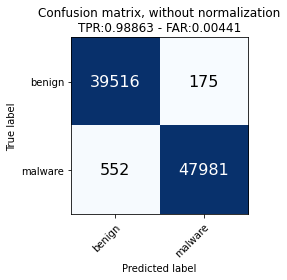

In [10]:
# Print Confusion Matrix
ypred = eclf.predict(X_val_scaled)

np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plot_confusion_matrix(directory=save_dir, y_true=y_val, y_pred=ypred, 
                        classes=class_names, 
                        normalize=False)

In [15]:
# Make submission with JSON format
if submit == "test-std" or submit == "both":
    do_submit(eclf, test_set, scaler, class_label_pair, save_dir+"/submission_test-std.json")
if submit == "test-challenge" or submit == "both":
    do_submit(eclf, challenge_set, scaler, class_label_pair, save_dir+"/submission_test-challenge.json")


Loading submission set ...
Reading 1_test-std_set.json.gz
Predicting on 1_test-std_set ...
Submission file is created as ./results/20210428-052645/submission_test-std.json

Loading submission set ...
Reading 0_test-challenge_set.json.gz
Predicting on 0_test-challenge_set ...
Submission file is created as ./results/20210428-052645/submission_test-challenge.json

